# Take Home Quiz 1

---

This homework should be submitted **by LT** on ALICE.

## Libraries

---

Do <b>NOT</b> import any other libraries aside from those below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [15, 5]

## Part 1. Combinations of Functions

---

For a more detailed discussion on combinations of functions, see [`Paul's Online Notes`](http://tutorial.math.lamar.edu/Classes/Alg/CombineFunctions.aspx).

Let the following: 

- $f(x) = \sin(2\pi x)$ 


- $g(x) = \cos\left(\frac{x}{\pi}\right)$

### Preliminaries

---

#### Q. Create a numpy array (called `x`) of 1000 equally spaced numbers from -25 to 25.

In [16]:
x = np.linspace(-25, 25, 1000)

#### Q. Create two functions called `f(x)` and `g(x)` as defined above.

In [ ]:
def f(x):
    return np.sin(2 * np.pi * x)

def g(x):
    return np.cos(x / np.pi)

#### Q. Plot both graphs of `f(x)` and `g(x)` simulteneously (i.e. on the same plot) as a <b><u>solid blue line</u></b> and <b><u>solid red line</u></b>, respectively.

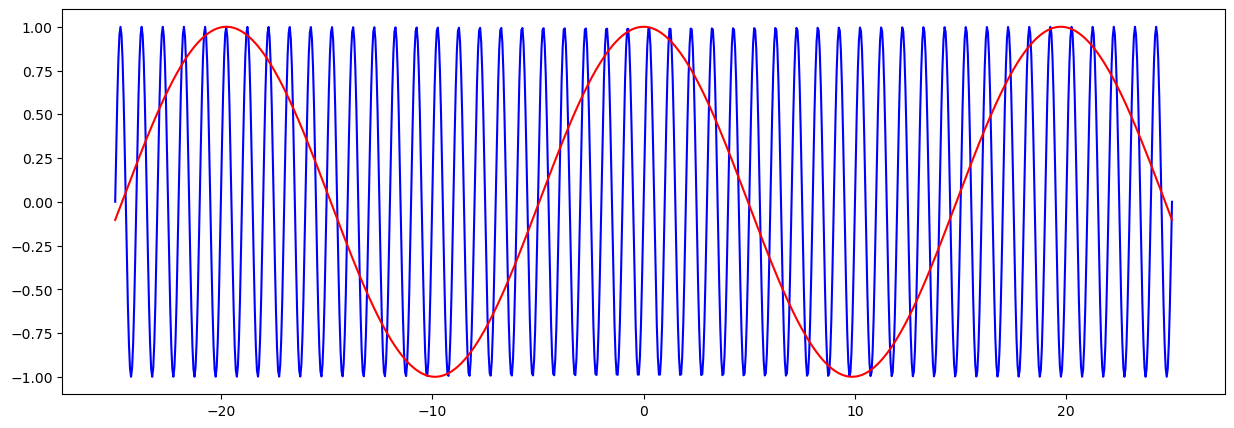

In [17]:
plt.plot(x, f(x), 'b-')
plt.plot(x, g(x), 'r-')
plt.show()

#### Q. Based on the resulting plot above, describe the differences between the two functions. Answer in 1 to 2 sentences.

Answer here.

### Sums of Functions

---

#### Q. Plot a graph of $f(x) + g(x)$ as a <b><u>solid blue line</u></b>.

In [ ]:
# Insert code here

#### Q. Describe how the two sinusoids interact when you add them. Answer in 1 to 2 sentences.

Answer here.

### Products of Functions

---

#### Q. Plot a graph of $f(x)g(x)$ as a <b><u>solid red line</u></b>. (1 pt.)

In [ ]:
# Insert code here

#### Q. Describe how the two sinusoids interact when you multiply them. Answer in 1 to 2 sentences.

Answer here.

### Composite Functions

---

#### Q. Plot a graph of $f(g(x))$ as a <b><u>solid green line</u></b>.

In [ ]:
# Insert code here

#### Q. Describe how the two sinusoids interact they are composited in 1 to 2 sentences.

Answer here.

### An Additive Model with Trend

---

#### Q. Plot all three graphs simulteneously as <b><u>dashed lines</u></b> (keep the colors specified above).

In [ ]:
# Insert code here

#### Q. Let's try adding a positive linear trend. Plot a graph of $f(x) + g(x) + \frac{1}{8}x$ as a <b><u>solid green line</u></b>.

In [ ]:
# Insert code here

#### Q. What kinds of data could reasonably follow the function described above? Answer in 2 to 3 sentences.

Answer here.

## Part 2. Curve Fitting

---

For this sections, we will be using the following datasets: `fit_data1.csv`, `fit_data2.csv`, `fit_data3.csv`, `fit_data4.csv`.

### `fit_data1.csv`

---

#### Q. Load the `fit_data1.csv` dataset using pandas and print the dataframe.

In [ ]:
# Insert code here

#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [ ]:
# Insert code here

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

In [ ]:
# Insert code here

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [ ]:
# Insert code here

#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

In [ ]:
# Insert code here

### `fit_data2.csv`

---

#### Q. Load the `fit_data2.csv` dataset using pandas and print the dataframe.

In [ ]:
# Insert code here

#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [ ]:
# Insert code here

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

In [ ]:
# Insert code here

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [ ]:
# Insert code here

#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>. 

In [ ]:
# Insert code here

### `fit_data3.csv`

---

#### Q. Load the `fit_data3.csv` dataset using pandas and print the dataframe.

In [ ]:
# Insert code here

#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [ ]:
# Insert code here

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots) 

In [ ]:
# Insert code here

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [ ]:
# Insert code here

#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>. 

In [ ]:
# Insert code here

### `fit_data4.csv`

---

#### Q. Load the `fit_data4.csv` dataset using pandas and print the dataframe.

In [ ]:
# Insert code here

#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [ ]:
# Insert code here

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots)

In [ ]:
# Insert code here

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [ ]:
# Insert code here

#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

In [ ]:
# Insert code here